# WiFi Indoor Localization

Projekt z uczenia maszynowego w ramach przedmiotu Podstawy Sztucznej Inteligencji prowadzonego na Wydziale Elektroniki i Technik Informacyjnych Politechniki Warszawskiej.

## Autorzy
- Maciej Szulik
- Wiktor Michalski

## Opis zadania
Zbiór danych: [Wireless+Indoor+Localization](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). Algorytmy do porównania: naiwny klasyfikator bayesa, sieć MLP.
ogarytmicznej do określania mocy nadajników (dBm). Poniżej przedstawiono różne rozkłady związane z danymi.


# Dane
Dane zostały zebrane w rzeczywistych warunkach i reprezentują siłę sygnału z siedmiu punktów dostępowych WiFi mierzoną przez smartfona w czterech pomieszczeniach.  Zawierają 2000 pomiarów, po 500 na każde z pomieszczeń. Ujemne wartości siły sygnałów związane są z powszechnym stosowaniem skali logarytmicznej do określania mocy nadajników (dBm). Poniżej przedstawiono różne rozkłady związane z danymi.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = np.loadtxt('wifi_localization.txt', delimiter='\t')
X = data[:, 0:-1]
y = data[:, -1]
y_classes = np.unique(y)

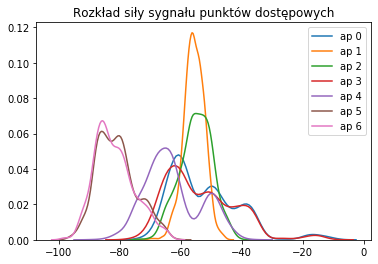

In [3]:
for access_point in range(0,7):
    sn.distplot(X[:,access_point], hist=False, label="ap "+str(access_point))
plt.title("Rozkład siły sygnału punktów dostępowych")
plt.show()

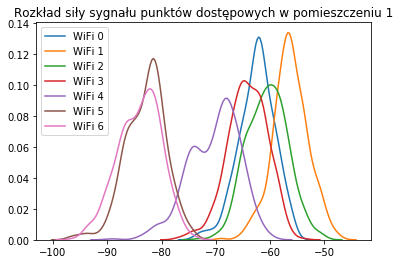

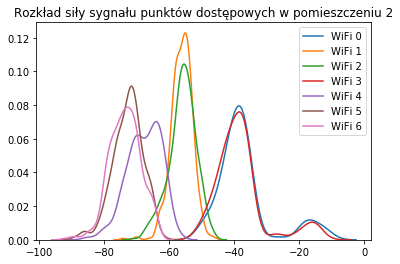

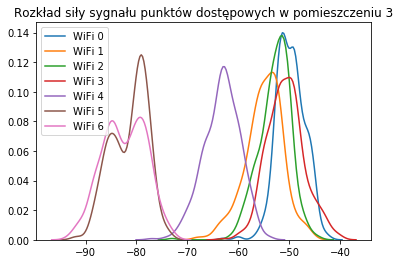

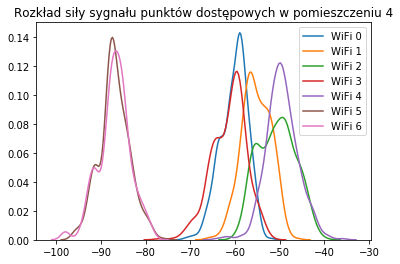

In [4]:
for room in range(1, 5):
    for access_point in range(0,7):
        sn.distplot(X[(room-1)*500:room*500,access_point], hist=False, label="WiFi " + str(access_point))
    plt.title("Rozkład siły sygnału punktów dostępowych w pomieszczeniu " + str(room))
    plt.show()

# Naiwny klasyfikator Bayesa
Na podstawie analizy powyższych rozkładów zdecydowaliśmy się zastosować naiwny klasyfikator Bayesa z gaussowskim rozkładem prawdopodobieństwa.

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Podzieliliśmy dane na dane treningowe i testowe w stosunku 4:1 (20% danych testowych) i wytrenowaliśmy model.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)

## Analiza

Wyniki analizy przedstawiają się następująco:

In [7]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
target_names = ['room '+ str(i) for i in range(1,5)]
print(classification_report(y_test, y_pred, target_names=target_names))

Number of mislabeled points out of a total 400 points : 10
              precision    recall  f1-score   support

      room 1       1.00      1.00      1.00       107
      room 2       1.00      0.90      0.95        93
      room 3       0.92      0.99      0.95       101
      room 4       0.99      1.00      0.99        99

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



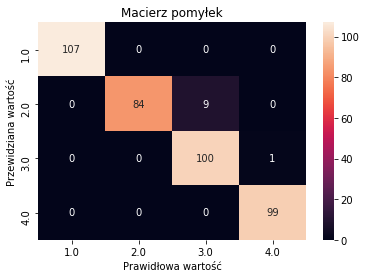

In [8]:
ax = sn.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred),  fmt='g', annot=True)
ax.set_xticklabels(y_classes)
ax.set_yticklabels(y_classes)
plt.xlabel("Prawidłowa wartość"), 
plt.ylabel("Przewidziana wartość")
plt.title("Macierz pomyłek")
plt.show()

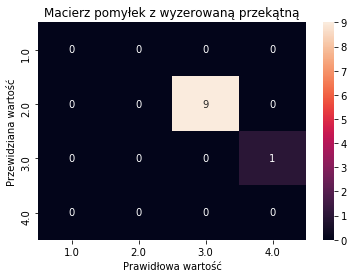

In [9]:
ax = sn.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred) *(1 - np.eye(4)),  fmt='g', annot=True)
ax.set_xticklabels(y_classes)
ax.set_yticklabels(y_classes)
plt.xlabel("Prawidłowa wartość"), 
plt.ylabel("Przewidziana wartość")
plt.title("Macierz pomyłek z wyzerowaną przekątną")
plt.show()

# MLP

In [ ]:
import keras

In [11]:
StandardScaler
model = keras.models.Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))



SyntaxError: invalid syntax (<ipython-input-11-58b8ebb20698>, line 1)